In [19]:
# Import libraries and Warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ML Classifcation Model
from sklearn.naive_bayes import MultinomialNB

# validation metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [3]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# Importing the data

data = pd.read_csv(r'/content/drive/MyDrive/Data Science/Practice - ML/Note books/NLP/Spam.csv',encoding='latin')

In [9]:
# Understanding the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [13]:
# Dropping the irrelavant columns

data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [14]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
round(data['v1'].value_counts(normalize=True)*100,2)

,proportion
v1,
ham,86.59
spam,13.41


In [18]:
# stats nature of the text column wrt target
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [20]:
# function to remove stopwords and puntuations
def text_preprocessing(message):
    clean_text = ''.join([char for char in message if char not in string.punctuation])
    return ' '.join([word for word in clean_text.split() if word.lower() not in stopwords.words('english')])

In [21]:
# encode the target
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# data sample
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# removing the stopwords and puntuations manually
data['clean_text'] = data['v2'].apply(text_preprocessing)

In [24]:
# sample data after preprocessing
data.head()

,v1,v2,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah dont think goes usf lives around though


In [25]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'], data['v1'], test_size=0.2, random_state=42)

# vectorization
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [30]:
x_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 37744 stored elements and shape (4457, 8270)>

In [26]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
print('Training Score:', round(model.score(x_train_tfidf, y_train)*100, 2), '%')

Training Score: 97.78 %


Testing Score: 96.77 %

Classification Report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



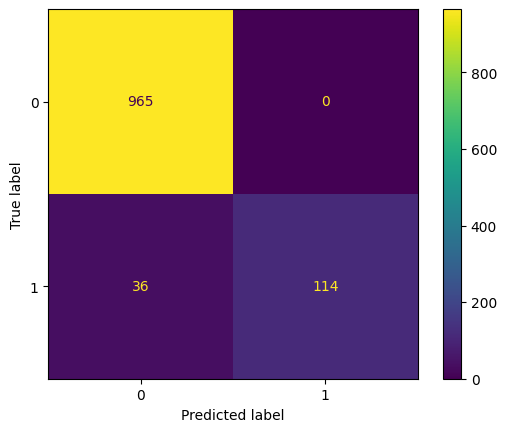

In [27]:
# model testing
y_pred = model.predict(x_test_tfidf)

# metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n\n', report)